This notebook contains the code and visualizations for the Capstone 1 project Statistical Data Analysis

In [72]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn
from collections import Counter
from pylab import savefig
from datetime import datetime
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency 
from scipy.stats import entropy

#The plots have to be made with large fonts to be legible
#when imported into a Google doc
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
#for applying singly if using default style
text_size = 18

#read in the final dataframe used for analysis after data wrangling
working_file_path = '/Users/alexia/Documents/Springboard/Capstone1/Cap1testing/'
working_file = working_file_path + 'finaldf_20191024-144437.csv'
#working_file = working_file_path + 'finaldf_20191108-170621.csv'  #correlated features removed
col_info_file = working_file_path + 'Extract9ColMapping.csv'
df_final = pd.read_csv(working_file, index_col = 'YEAR') 
df_final.index = pd.to_datetime(df_final.index, format='%Y')

#for analysis of hypertension, create a filtered dataset 
#where respondent stated they were told they had hypertension
HTN_column = "Ever told had hypertension"
df_HTN = df_final[df_final[HTN_column]==2]


Probability Mass Function (PMF) is the set of probabilities of discrete outcomes (as opposed to the Probability Density Function, PDF, which is used for continuous outcomes).

A probability distribution is the list of outcomes and their probabilities.

The distribution of a categorical variable lists all of the values the variable takes and how
often it takes each of these values.  This can be displayed with a bar chart or a pie chart.

set of counts in categories may (given some simple assumptions) be modelled as a multinomial distribution 

In [19]:
#https://www.datacamp.com/community/tutorials/categorical-data  - one hot encoding
#http://learntech.uwe.ac.uk/da/Default.aspx?pageid=1440

## Q1: Are there strong correlations between pairs of independent variables?

(re-write) The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two variables. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.


In [20]:
indep_list = []
cols = df_final.columns
results = np.empty(len(cols))
for i in range (len(cols)-1):
    j = i + 1
    while j < len(cols)-1:
        result = spearmanr(df_final[cols[i]], df_final[cols[j]])
        indep_list.append([cols[i], cols[j], result[0], result[1]])
        j += 1
df_all = pd.DataFrame(indep_list, columns=['feature 1', 'feature 2', 'correlation', 'pvalue'])
df_all.sort_values(by=['correlation'], inplace=True, ascending=False)

print('Independent variables with Spearman correlation > .30 or < -.30')
df_all = df_all[np.logical_or(df_all['correlation']>0.30, df_all['correlation']<-0.30)]
df_all

Independent variables with Spearman correlation > .30 or < -.30


,feature 1,feature 2,correlation,pvalue
658,Ever smoked 100 cigarettes in life,Age first smoked fairly regularly,0.924724,0.0
352,"Medical care delayed due to cost, past 12 months","Needed but couldn't afford medical care, past ...",0.666571,0.0
297,Has usual place for medical care,Kind of usual place for medical care,0.644476,0.0
403,"Needed but couldn't afford dental care, past 1...",Needed but couldn't afford prescription medici...,0.495959,0.0
702,Any family members have difficulty walking wit...,Any family member with work limitation due to ...,0.474715,0.0
427,Needed but couldn't afford prescription medici...,"Needed but couldn't afford mental health care,...",0.446732,0.0
688,Frequency of vigorous activity 10+ minutes: Ti...,Frequency of strengthening activity: Times per...,0.439964,0.0
682,Frequency of moderate activity 10+ minutes: Ti...,Frequency of vigorous activity 10+ minutes: Ti...,0.437131,0.0
379,"Needed but couldn't afford medical care, past ...",Needed but couldn't afford prescription medici...,0.396998,0.0
404,"Needed but couldn't afford dental care, past 1...","Needed but couldn't afford mental health care,...",0.390585,0.0


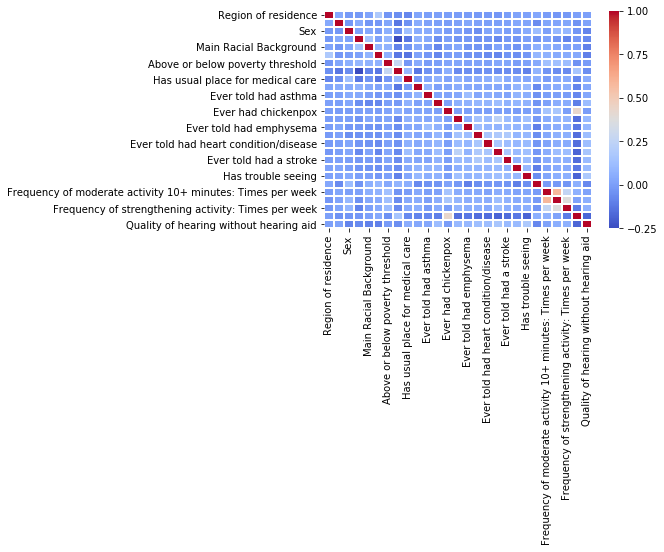

In [5]:

text_size = 9
df_cm = df_final.corr(method ='spearman')
svm = sn.heatmap(df_cm, annot=False,cmap='coolwarm', linecolor='white', linewidths=1)

These results this might mean there are redundant features in the dataset, which could be misleading to modeling algorithms. Instance-based methods such as k-nearest neighbor use small neighborhoods in the attribute space to determine classification and regression predictions. These predictions can be greatly skewed by redundant attributes.

We could perform bootstrap sampling to test if this is just due to chance, but Scipy stats includes the p-value, which indicates the probability of an uncorrelated system producing data that have a Spearman correlation at least as extreme as the one computed from this data.  The results above indicate that the p-value is very small, meaning there is a low probability that these correlations occurred by chance.

In fact, just looking the feature list above highlights common-sense overlaps, ex. "Total combined family income" and "Person's total earnings, previous calendar year". 

These features were reviewed and redundant features that are not correlated with the target variable were eliminated and the models re-run. However they produced lower F1 scores for HTN-positive predictions, so the cutoff of 0.3 seems too low and/or the ranking effects included in the Spearman test are not valid for this unranked data.  Only the features with 0.9 related to smoking and 0.6 kind of usual place for medical care were removed.

Cramer's V is a nominal version of Pearson's Chi Squared test for independence, and was used between all features and for all features to the target.

In [26]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


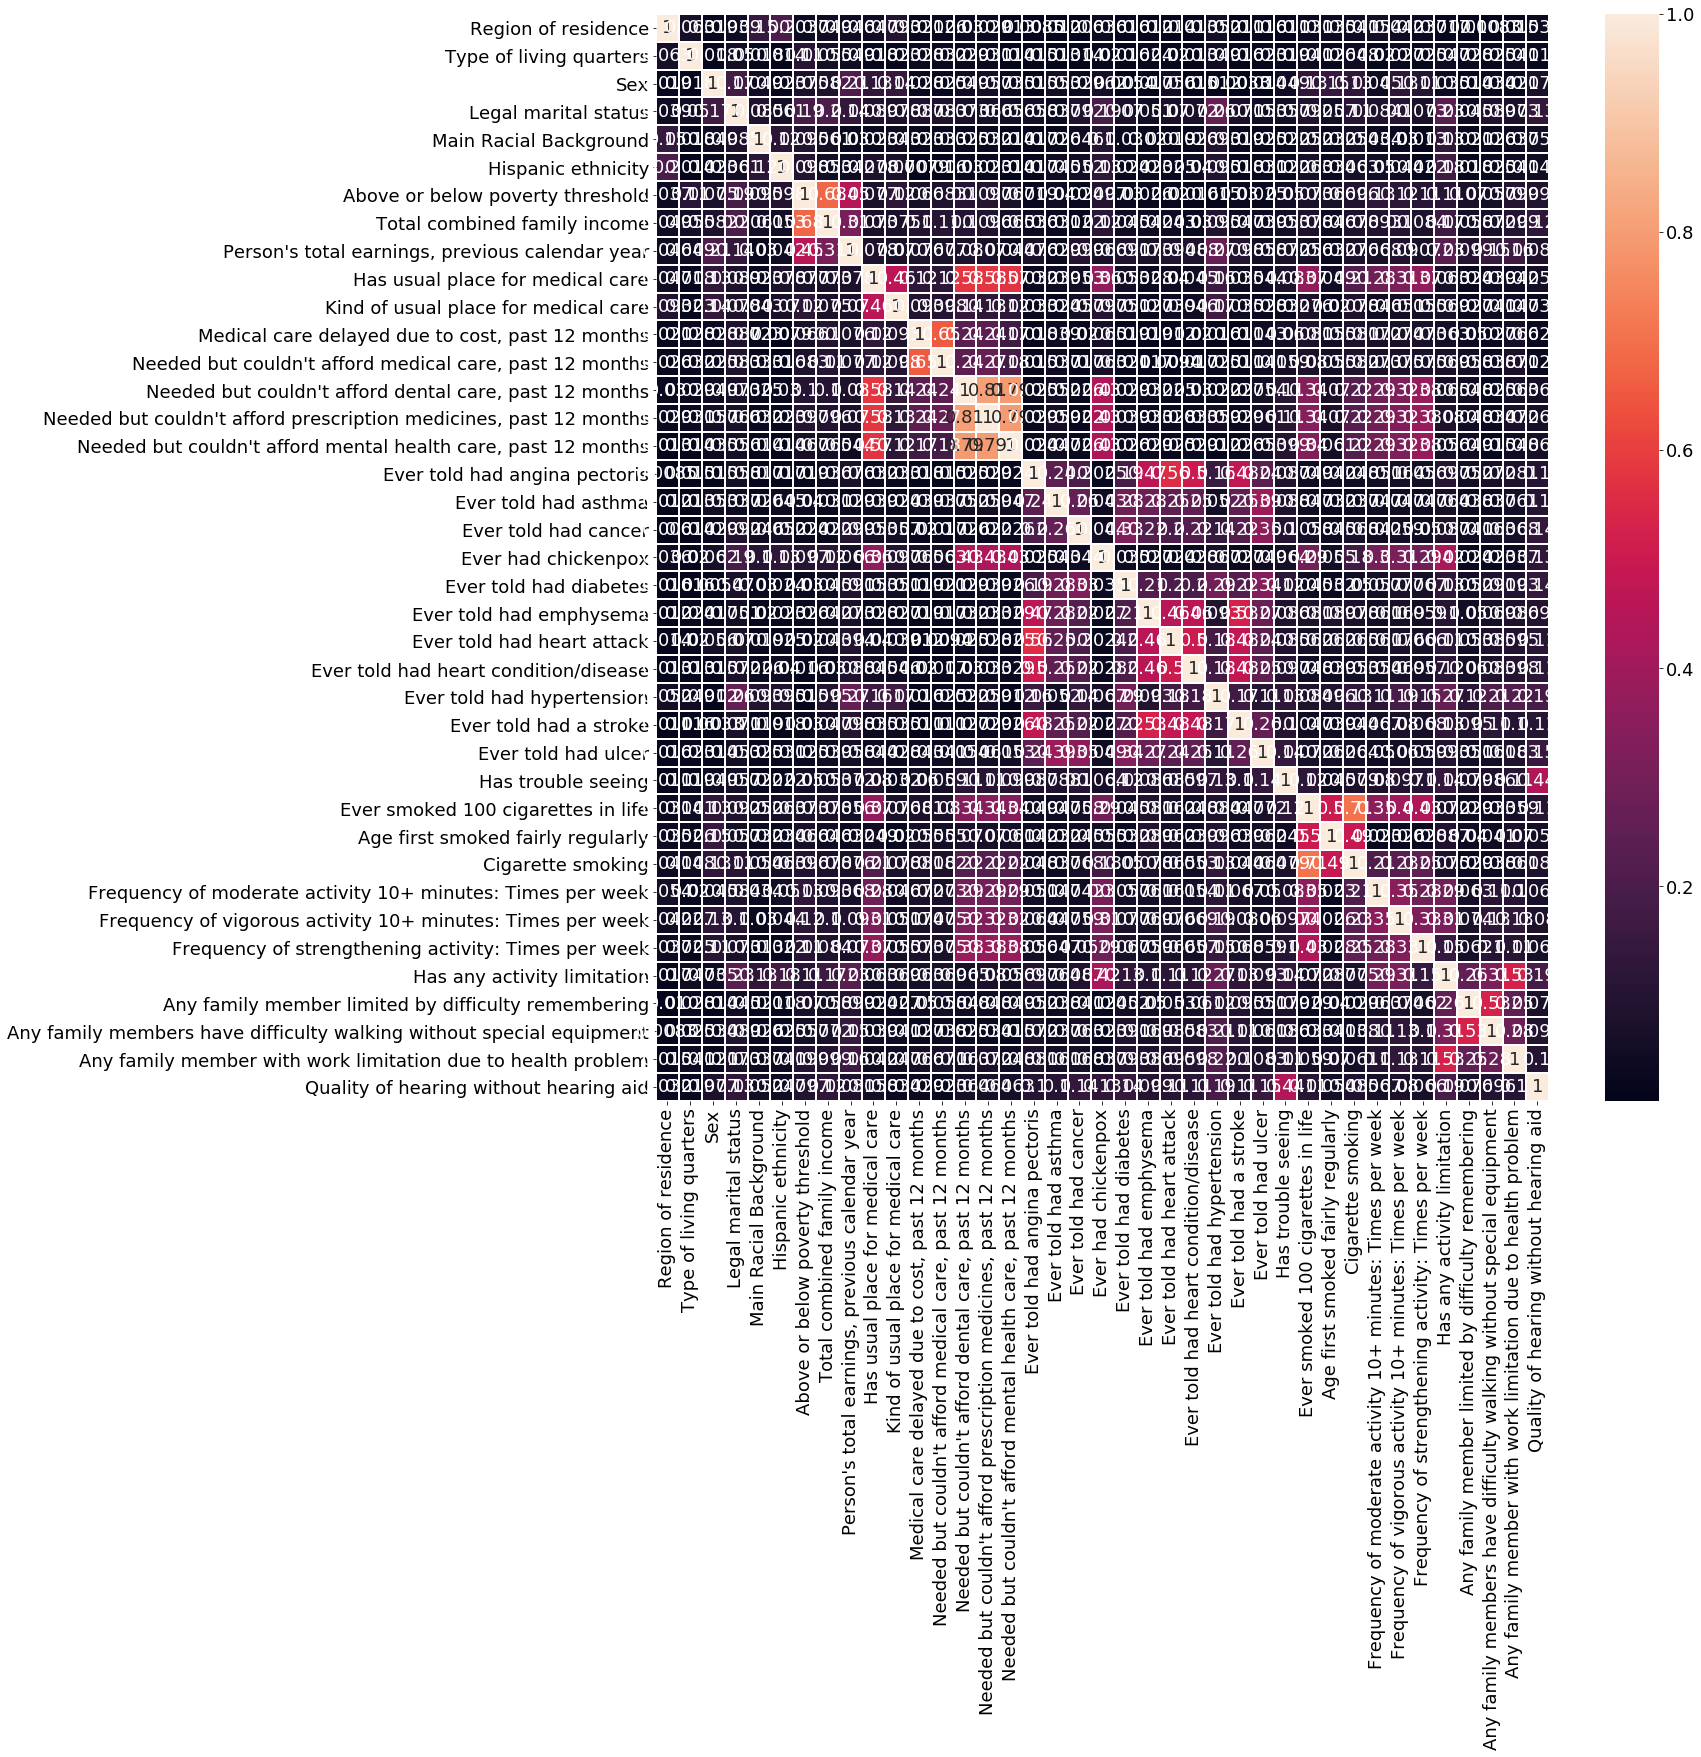

In [34]:
columns = df_final.columns
corr = pd.DataFrame(index=columns, columns=columns)
for i in range(0,len(columns)):
    for j in range(i,len(columns)):
        if i == j:
            corr[columns[i]][columns[j]] = 1.0
        else:
            cell = cramers_v(df_final[columns[i]], df_final[columns[j]])
            corr[columns[i]][columns[j]] = cell
            corr[columns[j]][columns[i]] = cell
corr.fillna(value=np.nan, inplace=True)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20), sharex = True)
sn.heatmap(corr,annot=True, linecolor='white', linewidths=1)

          

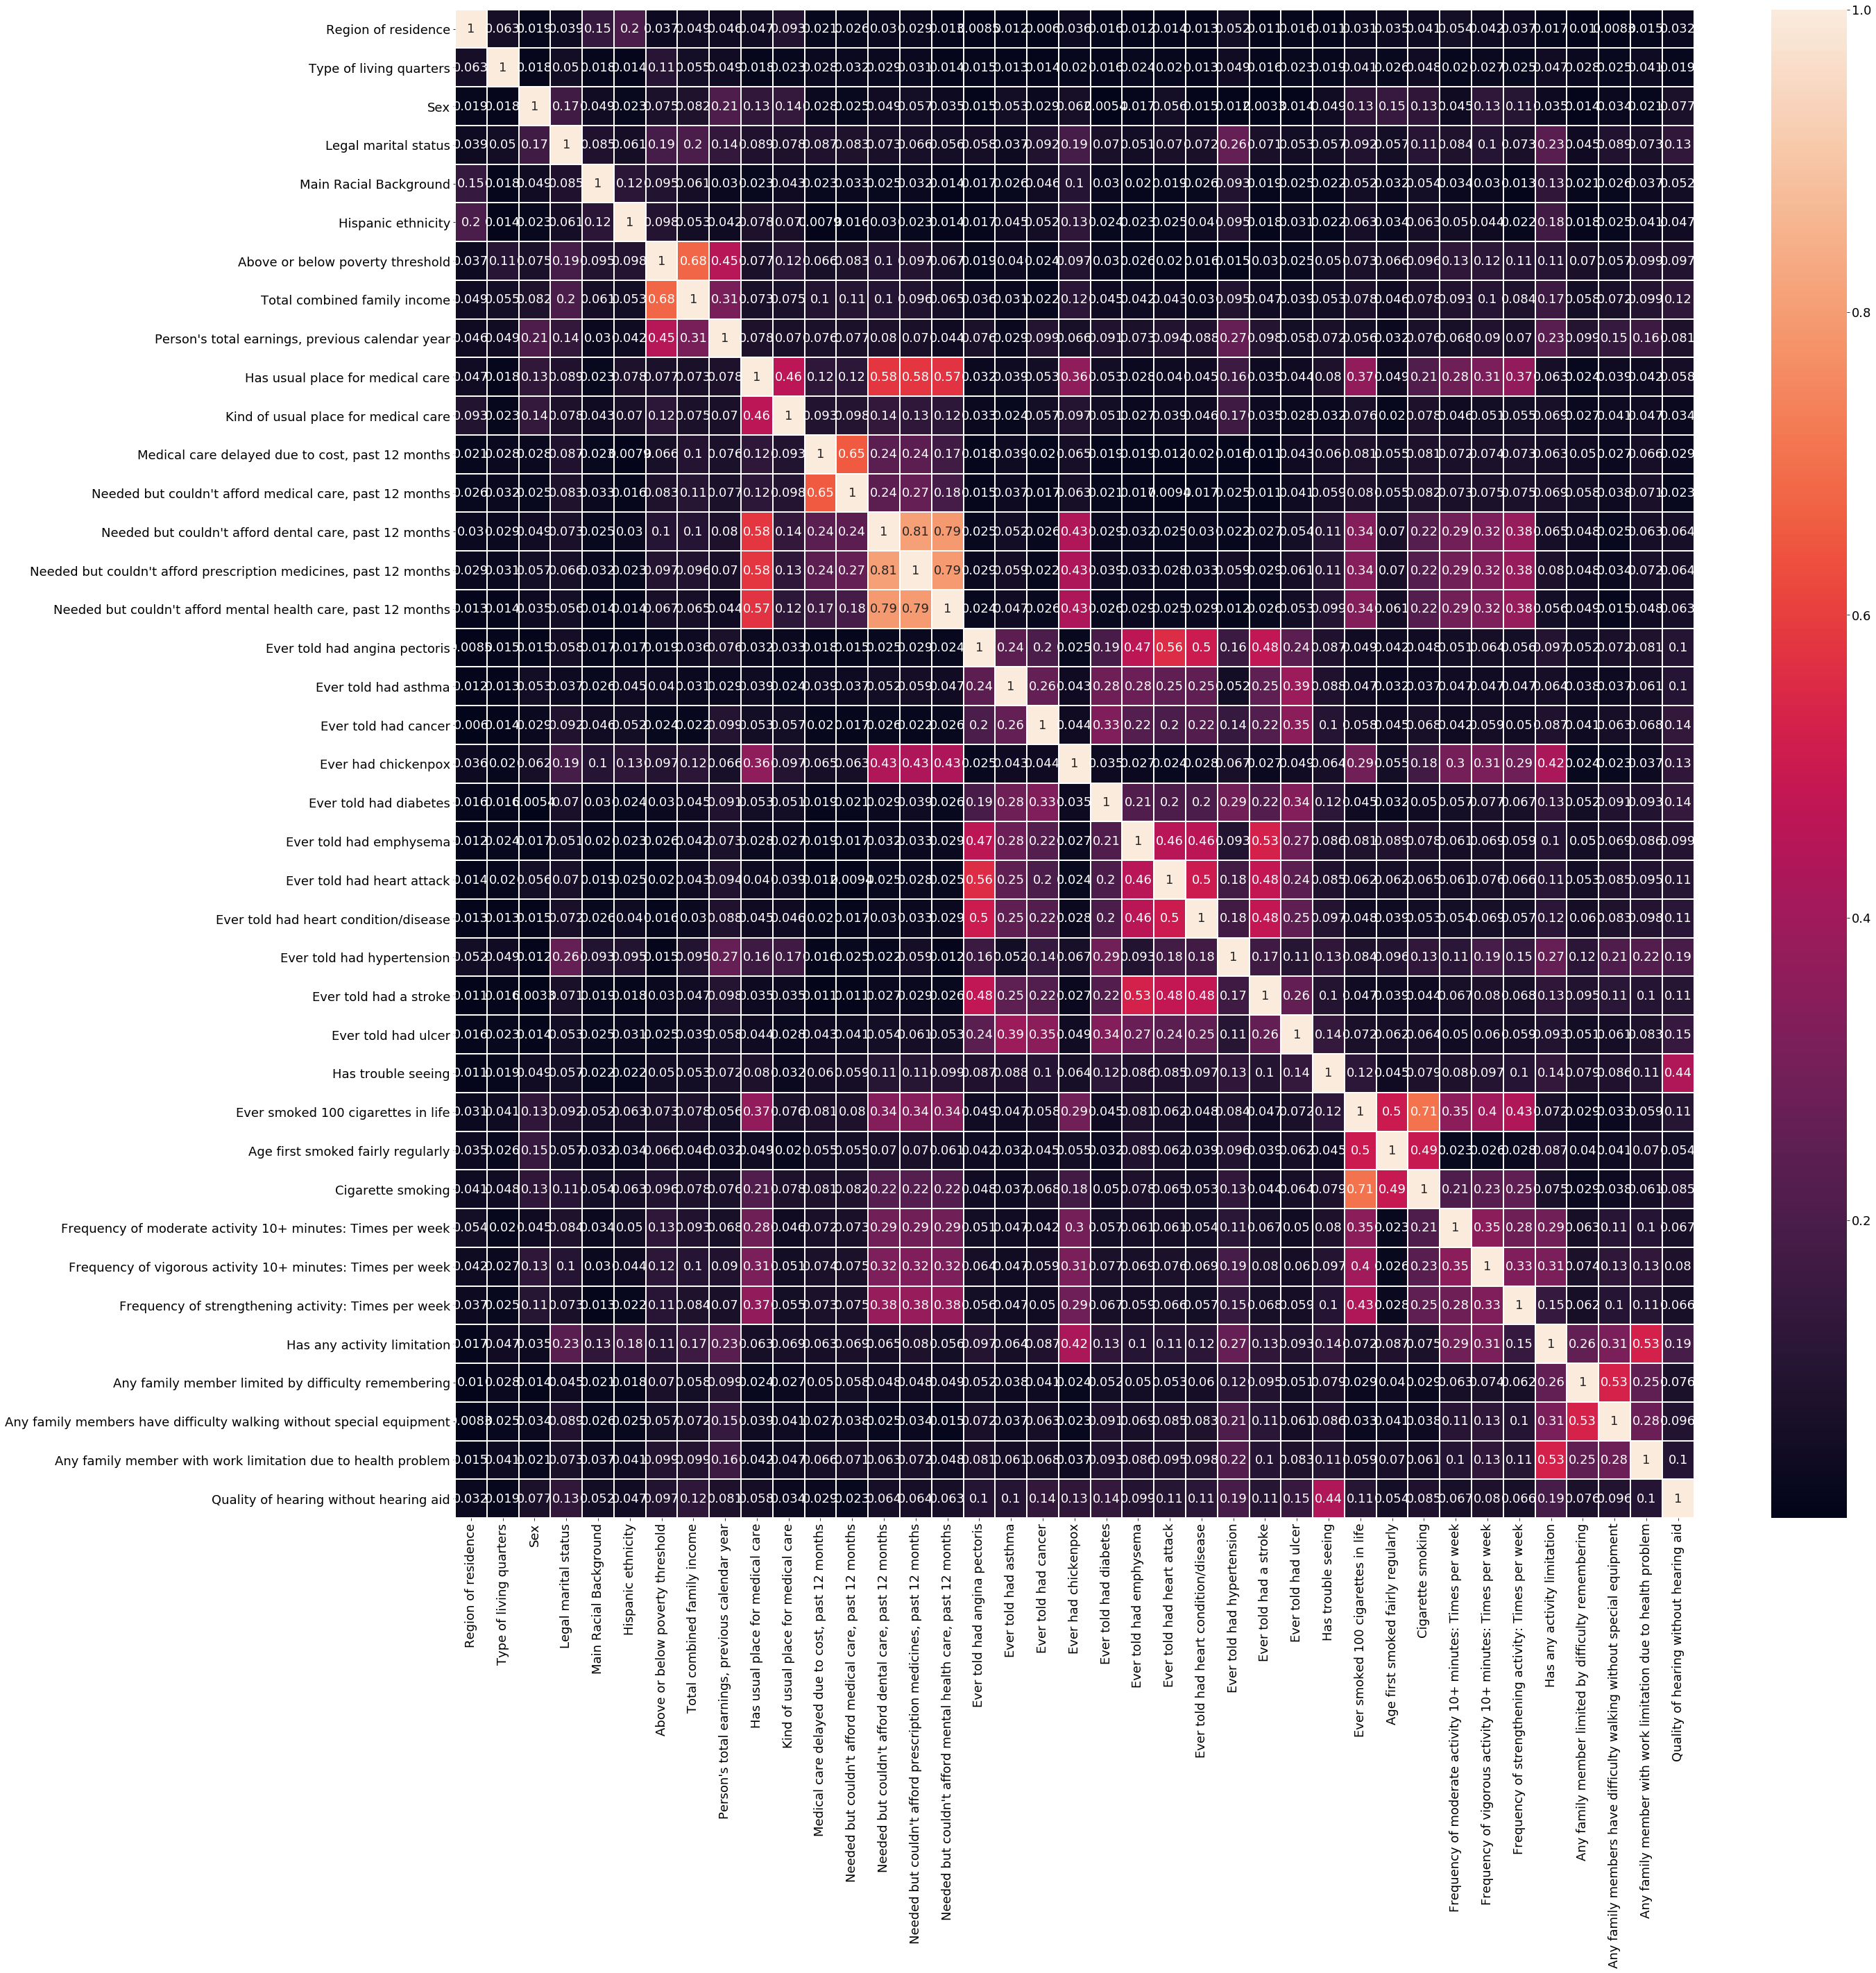

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(40,40), sharex = True)
sn.heatmap(corr,annot=True, linecolor='white', linewidths=1)



In [50]:
len(cols)

39

In [58]:
indep_list = []
cols = df_final.columns
results = np.empty(len(cols))
for i in range(0,len(columns)):
    for j in range(i,len(columns)):
        if i == j:
            indep_list.append([cols[i], cols[j], 1, 1, 1])
        else:
            result_s = spearmanr(df_final[cols[i]], df_final[cols[j]])
            result_v = cramers_v(df_final[cols[i]], df_final[cols[j]])
            confusion_matrix = pd.crosstab(df_final[cols[i]],df_final[cols[j]])
            chi2_pvalue = chi2_contingency(confusion_matrix)[1]
            indep_list.append([cols[i], cols[j], result_s[0], result_s[1], result_v, chi2_pvalue])
df_v = pd.DataFrame(indep_list, columns=['feature 1', 'feature 2', 'S correlation', 'S pvalue', 'C-V correlation', 'chi2 pvalue'])
df_v.sort_values(by=['C-V correlation'], inplace=True, ascending=False)

print('Correlation Values')
df_v = df_v[df_v['C-V correlation']>0.30]
df_v

Correlation Values


,feature 1,feature 2,S correlation,S pvalue,C-V correlation,chi2 pvalue
0,Region of residence,Region of residence,1.000000,1.0,1.000000,NaN
374,"Medical care delayed due to cost, past 12 months","Medical care delayed due to cost, past 12 months",1.000000,1.0,1.000000,NaN
549,Ever told had cancer,Ever told had cancer,1.000000,1.0,1.000000,NaN
527,Ever told had asthma,Ever told had asthma,1.000000,1.0,1.000000,NaN
504,Ever told had angina pectoris,Ever told had angina pectoris,1.000000,1.0,1.000000,NaN
...,...,...,...,...,...,...
754,Frequency of vigorous activity 10+ minutes: Ti...,Has any activity limitation,-0.143040,0.0,0.314073,0.0
767,Has any activity limitation,Any family members have difficulty walking wit...,-0.443783,0.0,0.313309,0.0
583,Ever had chickenpox,Frequency of vigorous activity 10+ minutes: Ti...,0.080665,0.0,0.313007,0.0
338,Has usual place for medical care,Frequency of vigorous activity 10+ minutes: Ti...,0.051037,0.0,0.312330,0.0


## Q1: Are there strong correlations between the independent and target variables in this project?

In [61]:
df_v_htn = pd.DataFrame(indep_list, columns=['feature 1', 'feature 2', 'S correlation', 
                                             'S pvalue', 'C-V correlation', 'chi2 pvalue'])

print('Correlation Values')
df_v_htn = df_v_htn[np.logical_or(df_v_htn['feature 1']=='Ever told had hypertension', 
                                  df_v_htn['feature 2']=='Ever told had hypertension')]
df_v_htn.sort_values(by=['C-V correlation'], inplace=True, ascending=False)
df_v_htn


Correlation Values


,feature 1,feature 2,S correlation,S pvalue,C-V correlation,chi2 pvalue
660,Ever told had hypertension,Ever told had hypertension,1.000000,1.000000e+00,1.000000,NaN
594,Ever told had diabetes,Ever told had hypertension,0.286089,0.000000e+00,0.288652,0.000000e+00
670,Ever told had hypertension,Has any activity limitation,-0.213338,0.000000e+00,0.267111,0.000000e+00
300,"Person's total earnings, previous calendar year",Ever told had hypertension,-0.219217,0.000000e+00,0.265196,0.000000e+00
135,Legal marital status,Ever told had hypertension,-0.091685,0.000000e+00,0.261307,0.000000e+00
673,Ever told had hypertension,Any family member with work limitation due to ...,0.215478,0.000000e+00,0.217648,0.000000e+00
672,Ever told had hypertension,Any family members have difficulty walking wit...,0.209285,0.000000e+00,0.209323,0.000000e+00
674,Ever told had hypertension,Quality of hearing without hearing aid,0.163232,0.000000e+00,0.193255,0.000000e+00
668,Ever told had hypertension,Frequency of vigorous activity 10+ minutes: Ti...,0.161900,0.000000e+00,0.187612,0.000000e+00
629,Ever told had heart attack,Ever told had hypertension,0.181070,0.000000e+00,0.181299,0.000000e+00


In [103]:
df_final['Has any activity limitation'].value_counts(normalize=True)

21    0.733897
10    0.181380
20    0.083508
22    0.001215
Name: Has any activity limitation, dtype: float64

34% of values for total earnings feature indicate the question was not asked.

In [104]:
df_final["Person's total earnings, previous calendar year"].value_counts(normalize=True)

0     0.343772
6     0.083985
97    0.071854
7     0.065039
11    0.058513
99    0.050963
3     0.049263
5     0.048907
8     0.047632
4     0.044632
1     0.044143
2     0.040202
9     0.030153
10    0.020814
98    0.000128
Name: Person's total earnings, previous calendar year, dtype: float64

Total combined family income has no missing values - this is a better column to use for income.

In [146]:
df_final["Frequency of vigorous activity 10+ minutes: Times per week"].value_counts(normalize=True)

95    0.547616
3     0.087828
2     0.063023
7     0.062686
1     0.053285
4     0.039157
5     0.035685
0     0.026343
94    0.025535
96    0.023923
6     0.009120
98    0.006667
14    0.005162
21    0.004330
99    0.003643
97    0.002517
28    0.002386
10    0.000479
8     0.000140
12    0.000094
20    0.000091
15    0.000078
9     0.000049
13    0.000039
22    0.000028
11    0.000028
23    0.000016
25    0.000015
24    0.000012
16    0.000007
17    0.000007
27    0.000004
26    0.000004
18    0.000001
Name: Frequency of vigorous activity 10+ minutes: Times per week, dtype: float64

Look at the % NIU for the variables considered correlated to the target - this would be misleading and is creating noise.

In [125]:
i = 0
features[i]
#df_final[
pct_NIU = len(df_final[df_final[features[i]]==0]) / len(df_final[features[i]])
print(features[i], pct_NIU )

Region of residence 0.0


In [126]:
for i in range (len(features)-1):
    pct_NIU = len(df_final[df_final[features[i]]==0]) / len(df_final[features[i]])
    print(features[i], pct_NIU )

Region of residence 0.0
Type of living quarters 0.0
Sex 0.0
Legal marital status 0.0
Main Racial Background 0.0
Hispanic ethnicity 0.0
Above or below poverty threshold 0.0
Total combined family income 0.0
Person's total earnings, previous calendar year 0.34377208704495094
Has usual place for medical care 0.0
Kind of usual place for medical care 0.15380486161021828
Medical care delayed due to cost, past 12 months 0.0
Needed but couldn't afford medical care, past 12 months 0.0
Needed but couldn't afford dental care, past 12 months 0.0
Needed but couldn't afford prescription medicines, past 12 months 0.0
Needed but couldn't afford mental health care, past 12 months 0.0
Ever told had angina pectoris 0.0
Ever told had asthma 0.0
Ever told had cancer 0.0
Ever had chickenpox 0.147852356398794
Ever told had diabetes 0.0
Ever told had emphysema 0.0
Ever told had heart attack 0.0
Ever told had heart condition/disease 0.0
Ever told had a stroke 0.0
Ever told had ulcer 0.0
Has trouble seeing 0.0
E

Many of these are in the correlated list to remove:
Age first smoked fairly regularly 0.5791420758019927
Kind of usual place for medical care 0.15380486161021828
Person's total earnings, previous calendar year 0.34377208704495094
Kind of usual place for medical care 0.15380486161021828

Not all features use 0 for NIU

In [134]:
df_final["Frequency of vigorous activity 10+ minutes: Times per week"].value_counts(normalize=True)

95    0.547616
3     0.087828
2     0.063023
7     0.062686
1     0.053285
4     0.039157
5     0.035685
0     0.026343
94    0.025535
96    0.023923
6     0.009120
98    0.006667
14    0.005162
21    0.004330
99    0.003643
97    0.002517
28    0.002386
10    0.000479
8     0.000140
12    0.000094
20    0.000091
15    0.000078
9     0.000049
13    0.000039
22    0.000028
11    0.000028
23    0.000016
25    0.000015
24    0.000012
16    0.000007
17    0.000007
27    0.000004
26    0.000004
18    0.000001
Name: Frequency of vigorous activity 10+ minutes: Times per week, dtype: float64

In [15]:
df_final["Ever told had asthma"].value_counts(normalize=True)

1    0.904721
2    0.094519
9    0.000656
7    0.000103
Name: Ever told had asthma, dtype: float64

In [17]:

df_target_corr = df_final[np.logical_and(df_final["Ever told had asthma"]==7 , df_final["Ever told had hypertension"]==2)]
len(df_target_corr)

4

In [9]:
df_final["Total combined family income"].value_counts(normalize=True)

10    0.456661
20    0.253247
30    0.125985
96    0.109502
97    0.037392
99    0.017128
98    0.000085
Name: Total combined family income, dtype: float64

In [63]:
# thank you: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
    
def conditional_entropy(x, y):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    **Returns:** float
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples with missing values, or 'replace'
        to replace all missing values with the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when nan_strategy is set to 'replace'.
    """

    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy


In [70]:
#official, full version
def theils_u(x, y):
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-categorical association.
    This is the uncertainty of x given y: value is on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    **Returns:** float in the range of [0,1]
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples with missing values, or 'replace'
        to replace all missing values with the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when nan_strategy is set to 'replace'.
    """
    
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


In [78]:
#diabetes, emphysema, heart attacks, heart conditions and vision problems
comorbid_cols = ['Ever told had angina pectoris', 'Ever told had cancer', 'Ever told had diabetes',
       'Ever told had heart attack', 'Ever told had heart condition/disease', 'Has trouble seeing']

comorbid_list = []
cols = comorbid_cols
results = np.empty(len(cols))
for i in range(0,len(cols)):
    result_t = theils_u(df_final['Ever told had hypertension'], df_final[cols[i]])
    comorbid_list.append(['Ever told had hypertension', cols[i], result_t])
    
    result_t = theils_u(df_final[cols[i]], df_final['Ever told had hypertension'])
    comorbid_list.append([cols[i], 'Ever told had hypertension', result_t])
    
df_v = pd.DataFrame(comorbid_list, columns=['feature 1', 'feature 2', 'T-U'])
#df_v.sort_values(by=['T-U'], inplace=True, ascending=False)

print('Correlation Values')
#df_v = df_v[df_v['C-V correlation']>0.30]
df_v

Correlation Values


,feature 1,feature 2,T-U
0,Ever told had hypertension,Ever told had angina pectoris,0.018354
1,Ever told had angina pectoris,Ever told had hypertension,0.087731
2,Ever told had hypertension,Ever told had cancer,0.015805
3,Ever told had cancer,Ever told had hypertension,0.033008
4,Ever told had hypertension,Ever told had diabetes,0.061704
5,Ever told had diabetes,Ever told had hypertension,0.100838
6,Ever told had hypertension,Ever told had heart attack,0.024073
7,Ever told had heart attack,Ever told had hypertension,0.091252
8,Ever told had hypertension,Ever told had heart condition/disease,0.023528
9,Ever told had heart condition/disease,Ever told had hypertension,0.050453
